In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
col = np.array(['fuchsia', 'blue', 'cyan', 'violet', 'purple', 'darkviolet', 'dodgerblue', 'royalblue', 'aquamarine', 'springgreen', 'darkcyan', 'deepskyblue'])
data= pd.read_csv('Amazon Sales data.csv')
data= pd.DataFrame(data= data)
data[:3] 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75


In [305]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [306]:
data.shape

(100, 14)

In [307]:
data.size

1400

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [309]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [310]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [311]:
data = data.astype({'Ship Date': 'datetime64[ns]','Order Date':'datetime64[ns]'})


In [312]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

Проверки, есть ли NULL в датасете

<Axes: >

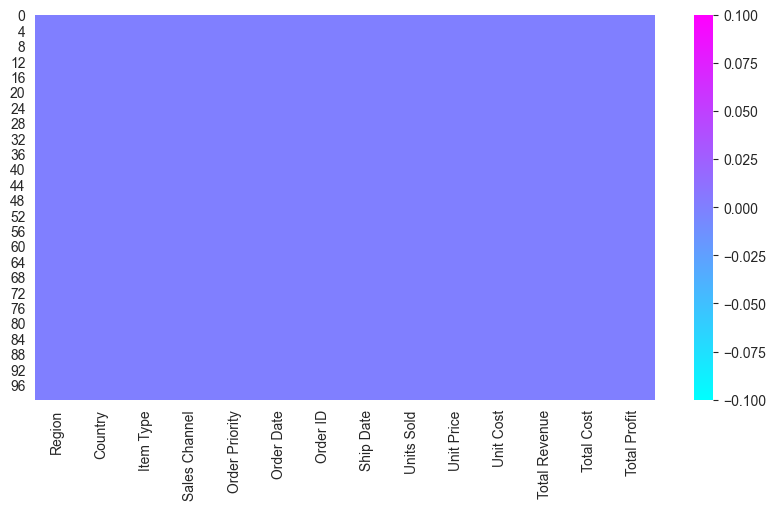

In [313]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cmap='cool')

Нашли NULL в Total Cost

<Axes: >

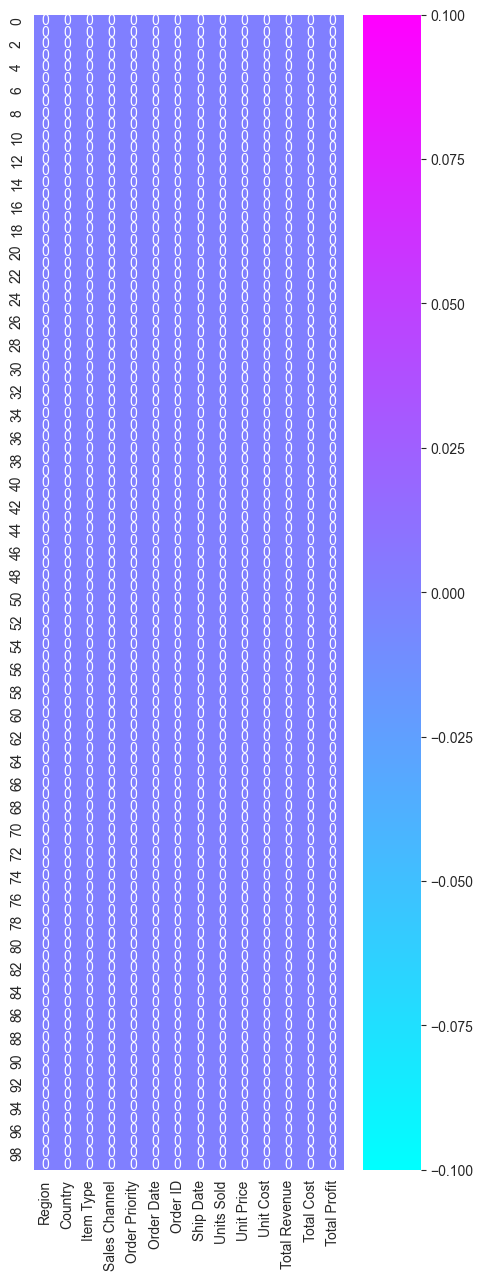

In [314]:
plt.figure(figsize=(5,15))
sns.heatmap(data.isnull(),annot= True, cmap='cool')

In [315]:
data['Total Cost']= data['Total Cost'].astype('Float64')

In [316]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.5,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


### Data Analysis:

Queries:

1. Which regions have the highest total sales revenue?
(Какие регионы имеют наибольший общий доход от продаж?)

2. What is the average unit price and unit cost for each item type?
(Какова средняя цена за единицу и стоимость за единицу для каждого типа товара?)

3. Which country has the highest total profit?
(Какая страна даёт наибольшую общую прибыль?)

4. How does the sales channel affect the order priority distribution?
(Как влияет канал продаж на распределение приоритетности заказов?)

5. What is the average order processing time (duration between order and ship dates) for each sales channel?
(Каково среднее время обработки заказа (промежуток между датой заказа и датой отправки) для каждого канала продаж?)

6. Which item types have the highest and lowest total sales?
(Какие типы товаров имеют наивысший и наименьший общий доход от продаж?)

7. How does the order priority vary across different regions?
(Как изменяется приоритет заказов в разных регионах?)

8. What is the correlation between unit price and total profit?
(Какова корреляция между ценой за единицу и общей прибылью?)

9. Are there any seasonal trends or patterns in the sales data?
(Есть ли сезонные тренды или паттерны в данных о продажах?)

10. How does the number of units sold vary across different countries?
(Как изменяется количество проданного товара в разных странах?)

### 1- Which regions have the highest total sales revenue?

In [317]:
print('Регион с самой большой выручкой:', data.groupby(data['Region'])['Total Revenue'].sum().idxmax())


Регион с самой большой выручкой: Sub-Saharan Africa


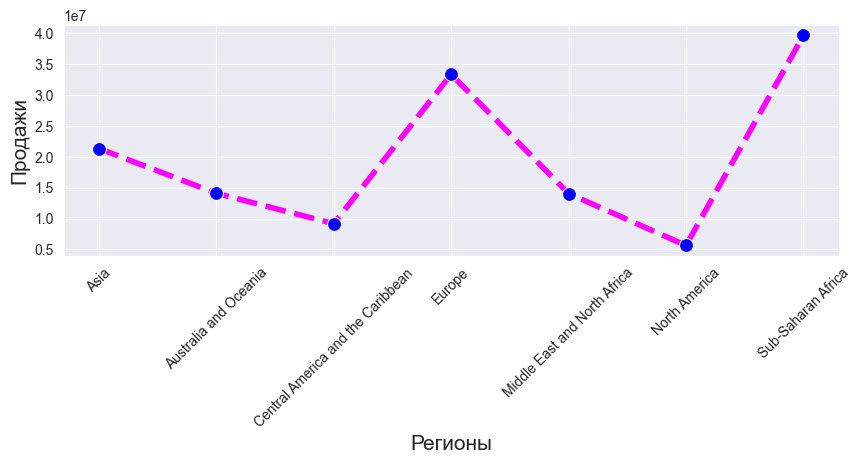

In [318]:

group_data= data.groupby(data['Region'])['Total Revenue'].sum()
plt.figure(figsize=(10,3))
sns.lineplot(data= group_data, linestyle= '--' ,linewidth= 4 , marker= 'o', markersize= 10, 
             markerfacecolor='blue', color='fuchsia')

plt.xticks(rotation= 45)
plt.xlabel('Регионы', fontsize= 15)
plt.ylabel('Продажи', fontsize= 15)
plt.show()

2- What is the average unit price and unit cost for each item type?

In [319]:
Avg_Unit_Price= data.groupby(data['Item Type'])['Unit Price'].mean()
Avg_Unit_Cost= data.groupby(data['Item Type'])['Unit Cost'].mean()

pd.DataFrame({'Average Unit Price': Avg_Unit_Price, 'Average Unit Cost': Avg_Unit_Cost})

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


3- Which country has the highest total profit?

In [320]:
print("Страна с наибольшей прибылью:", data.groupby(data['Country']) ['Total Profit'].sum().idxmax())

Страна с наибольшей прибылью: Djibouti


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\2692981968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= group_data.index, y= group_data, palette=col)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\2692981968.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x= group_data.index, y= group_data, palette=col)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\2692981968.py:3: UserWarning: 
The palette list has fewer values (12) than needed (76) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= group_data.index, y= group_data, palette=col)


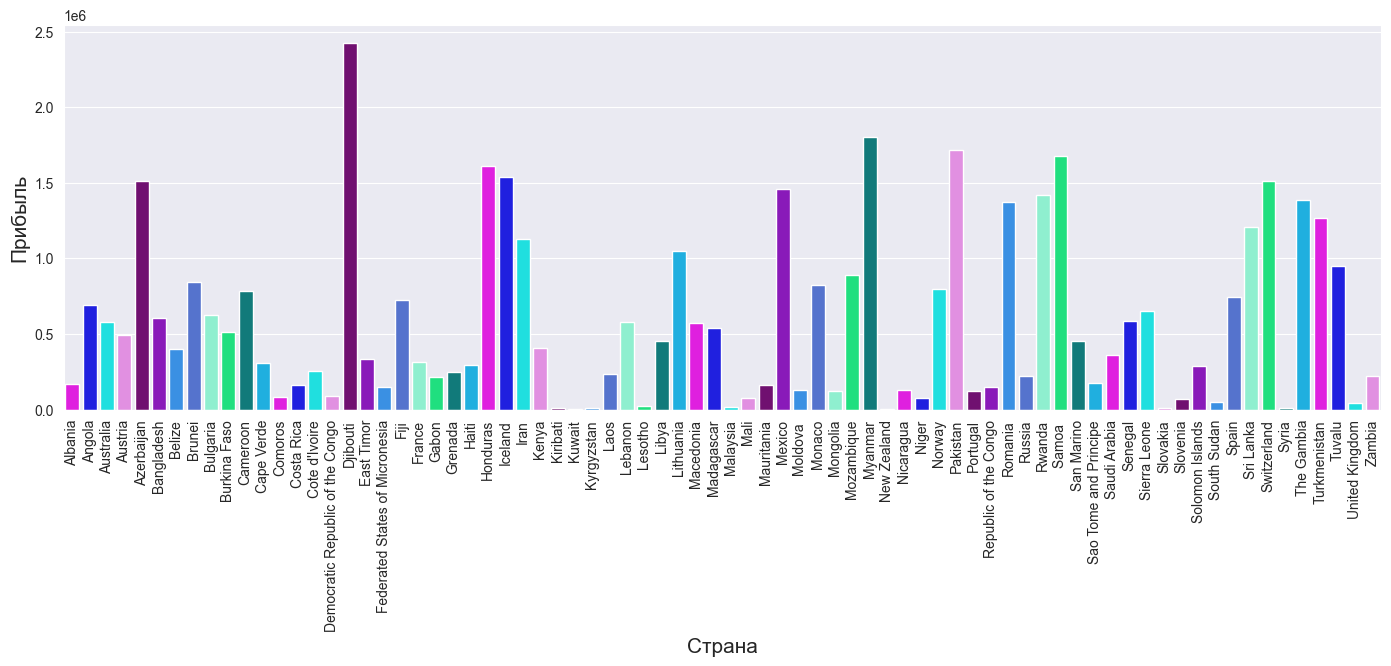

In [321]:
group_data= data.groupby(data['Country'])['Total Profit'].sum()
plt.figure(figsize=(17,5))
sns.barplot(x= group_data.index, y= group_data, palette=col)

plt.xticks(rotation= 90)
plt.xlabel('Страна', fontsize= 15,)
plt.ylabel('Прибыль', fontsize= 15)
plt.show()

4- How does the sales channel affect the order priority distribution? (H, M, L, C)

In [322]:
data.groupby(data['Sales Channel']) ['Order Priority'].value_counts()

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

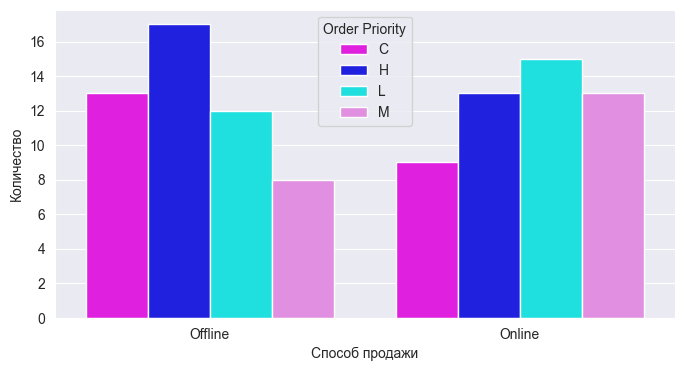

In [323]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Sales Channel', y='Count', hue='Order Priority', data=data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count().reset_index(name='Count'), 
            palette=['fuchsia', 'blue', 'cyan', 'violet'])
plt.xlabel('Способ продажи')
plt.ylabel('Количество')
plt.show()


5- What is the average order processing time (duration between order and ship dates) for each sales channel?

In [324]:
data['Processing Time']= data['Ship Date']-data['Order Date']

data.groupby(data['Sales Channel'])['Processing Time'].mean()

Sales Channel
Offline   23 days 04:48:00
Online    23 days 12:28:48
Name: Processing Time, dtype: timedelta64[ns]

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\3576583345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, x= data['Sales Channel'], y=data['Processing Time'].dt.days, width= 0.4, palette=['fuchsia', 'blue'])


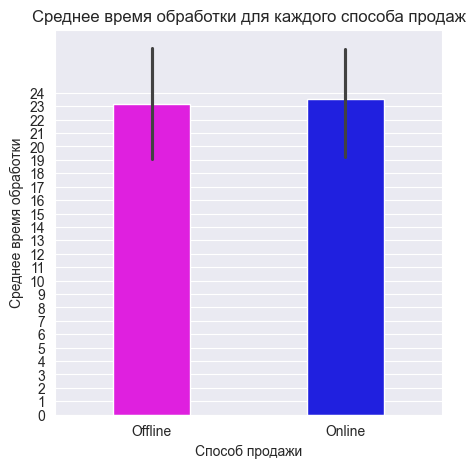

In [325]:
plt.figure(figsize=(5, 5))

sns.barplot(data= data, x= data['Sales Channel'], y=data['Processing Time'].dt.days, width= 0.4, palette=['fuchsia', 'blue'])

plt.title('Среднее время обработки для каждого способа продаж')
plt.xlabel('Способ продажи')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Среднее время обработки')

plt.show()



6- Which item types have the highest and lowest total sales?

In [326]:
group_item_type = data.groupby(data['Item Type'])['Total Revenue'].sum()

print(' Больше всего продали:', group_item_type.idxmax(), '\n' ,'Меньше всего продали:', group_item_type.idxmin())

 Больше всего продали: Cosmetics 
 Меньше всего продали: Fruits


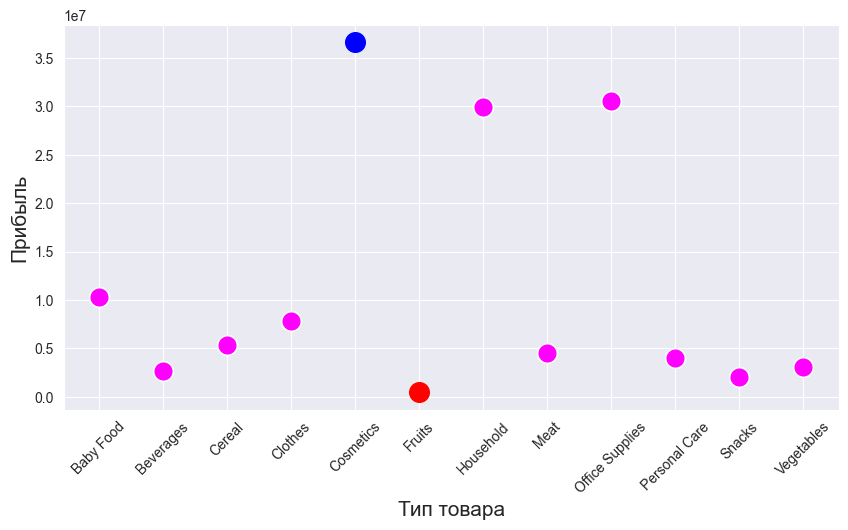

In [327]:
plt.figure(figsize=(10,5))

# Highlight Max Value
sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200, color='fuchsia')
max_index = group_item_type.idxmax()
plt.scatter(x=max_index, y=group_item_type[max_index], s=200, color='Blue')

# Highlight the minimum value
min_index = group_item_type.idxmin()
plt.scatter(x=min_index, y=group_item_type[min_index], s=200, color='RED')
plt.xticks(rotation= 45)
plt.xlabel('Тип товара', fontsize=15)
plt.ylabel('Прибыль', fontsize=15)
plt.show()

7- How does the order priority vary across different regions?

In [328]:
data.groupby(data['Region'])['Order Priority'].value_counts()

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   C                  2
                                   M                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  C                  2
                                   H                  2
                                   L                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       L                  

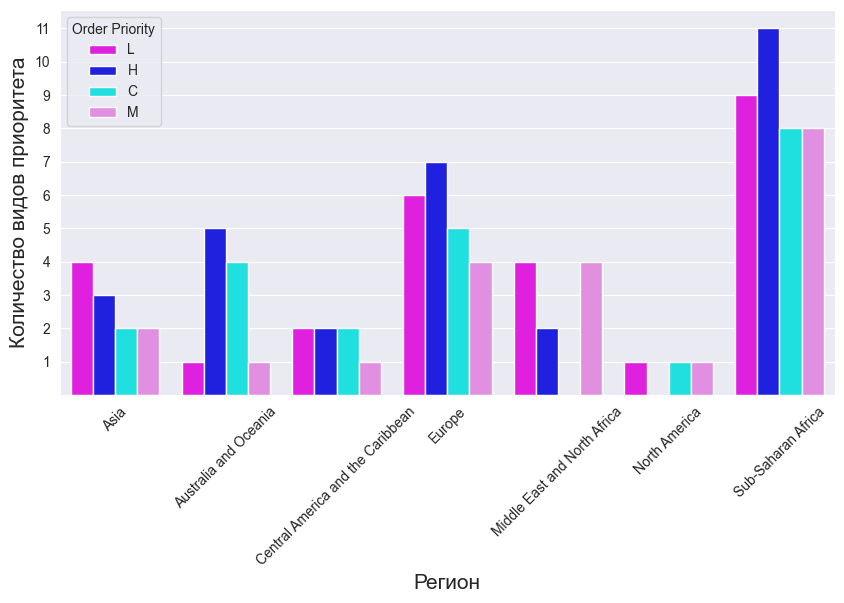

In [329]:
plt.figure(figsize= (10,5))
sns.barplot(data= data.groupby(data['Region'])['Order Priority'].value_counts().reset_index(name='Order Priority Count'), 
            x= 'Region', y= 'Order Priority Count', hue= 'Order Priority', palette=['fuchsia', 'blue', 'cyan', 'violet'])
plt.xticks(rotation= 45)
plt.yticks(np.arange(1,12,1))
plt.xlabel('Регион', fontsize=15)
plt.ylabel('Количество видов приоритета', fontsize=15)

plt.show()

8- What is the correlation between unit price and total profit?

In [330]:
print("Корреляция между ценой единицы товара и прибылью, которую он принёс:", np.round(data['Unit Price'].corr(data['Total Profit']), 2))


Корреляция между ценой единицы товара и прибылью, которую он принёс: 0.56


9- Are there any seasonal trends or patterns in the sales data?

In [331]:
month_names= {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEPT', 10: 'OCT', 11: 'NOV', 12: 'DEC'}
monthly_sales = data.groupby(data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales


Order Date
JAN     10482467.12
FEB     24740517.77
MAR      2274823.87
APR     16187186.33
MAY     13215739.99
JUN      5230325.77
JUL     15669518.50
AUG      1128164.91
SEPT     5314762.56
OCT     15287576.61
NOV     20568222.76
DEC      7249462.12
Name: Total Revenue, dtype: float64

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\4231016743.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= monthly_sales.index, y= monthly_sales,
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\4231016743.py:1: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x= monthly_sales.index, y= monthly_sales,


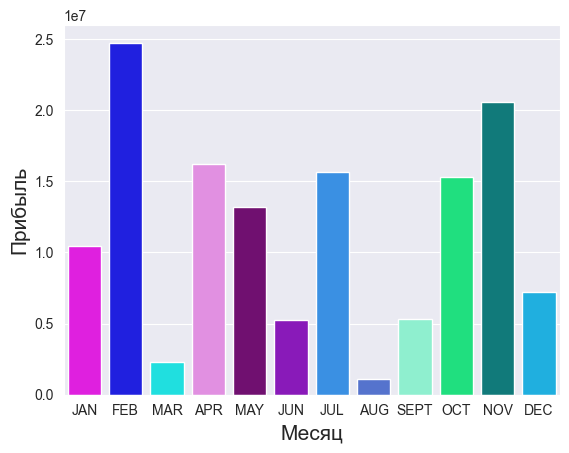

In [332]:

sns.barplot(x= monthly_sales.index, y= monthly_sales, 
            palette=col)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Прибыль', fontsize=15)
plt.show()


10- How does the number of units sold vary across different countries?

In [333]:
pd.set_option('display.max_rows',None)
data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\1863041885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold'), x= 'Country', y= 'Unit Sold', palette=col)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\1863041885.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold'), x= 'Country', y= 'Unit Sold', palette=col)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\1863041885.py:2: UserWarning: 
The palette list has fewer values (12) than needed (76) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data= data.groupby(data[

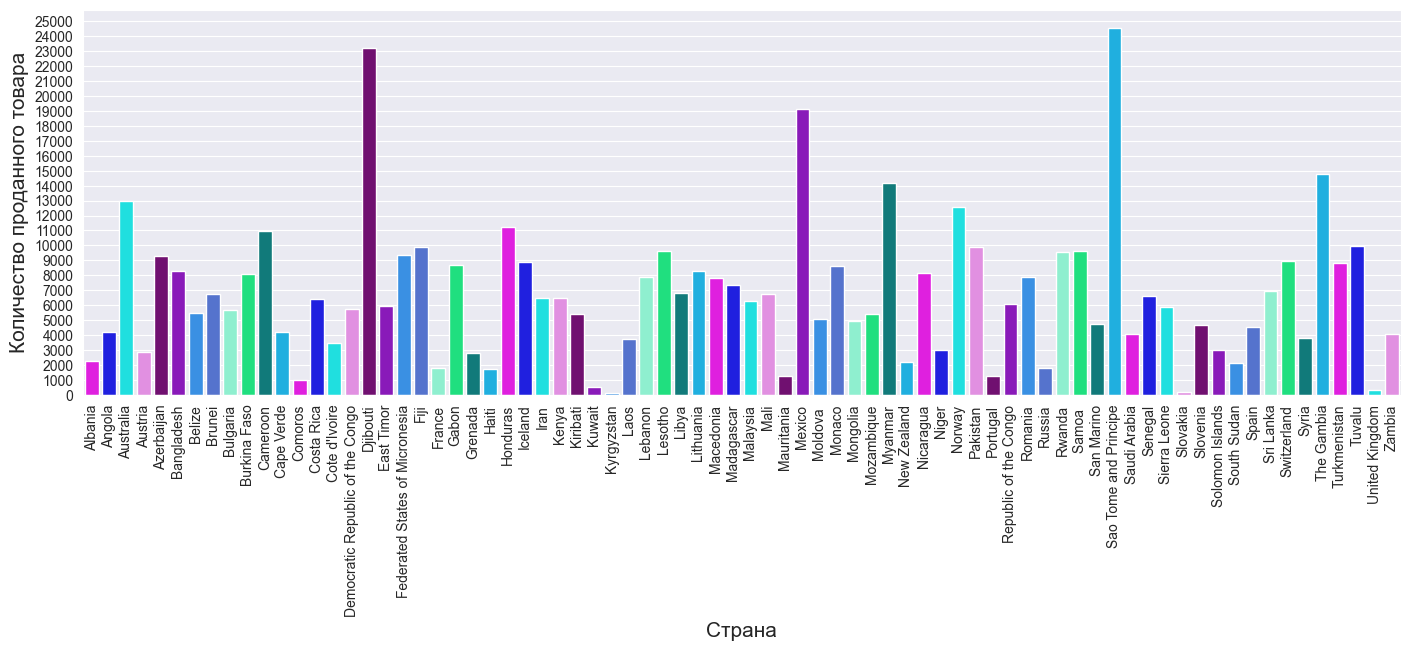

In [334]:
plt.figure(figsize= (17,5))
sns.barplot(data= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold'), x= 'Country', y= 'Unit Sold', palette=col)
plt.xticks(rotation= 90)
plt.yticks(np.arange(0,26000,1000))
plt.xlabel('Страна', fontsize=15)
plt.ylabel('Количество проданного товара', fontsize=15)
plt.show()

Other Queries:

11. How does the total sales revenue vary across different countries? 

12. What is the distribution of unit prices for each item type? 

13. Which sales channel has the highest average unit price?

14. Are there any outliers in the total cost distribution?

15. How does the total profit vary across different item types?

16. What is the average order processing time for each country?

17. Which region has the highest average total revenue per order?

18. Is there a relationship between the number of units sold and the total profit?

19. How does the order priority vary based on the item type?

20. Are there any trends or patterns in the order dates?

11- How does the total sales revenue vary across different countries? 

In [335]:
data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')

,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\132696091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= sales['Country'], y= sales['Total Revenue'], color='fuchsia', palette=col)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\132696091.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x= sales['Country'], y= sales['Total Revenue'], color='fuchsia', palette=col)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_14156\132696091.py:3: UserWarning: 
The palette list has fewer values (12) than needed (76) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x= sales['Country'], y= sales['Total Revenue'], color='fuchsia', palette=col)


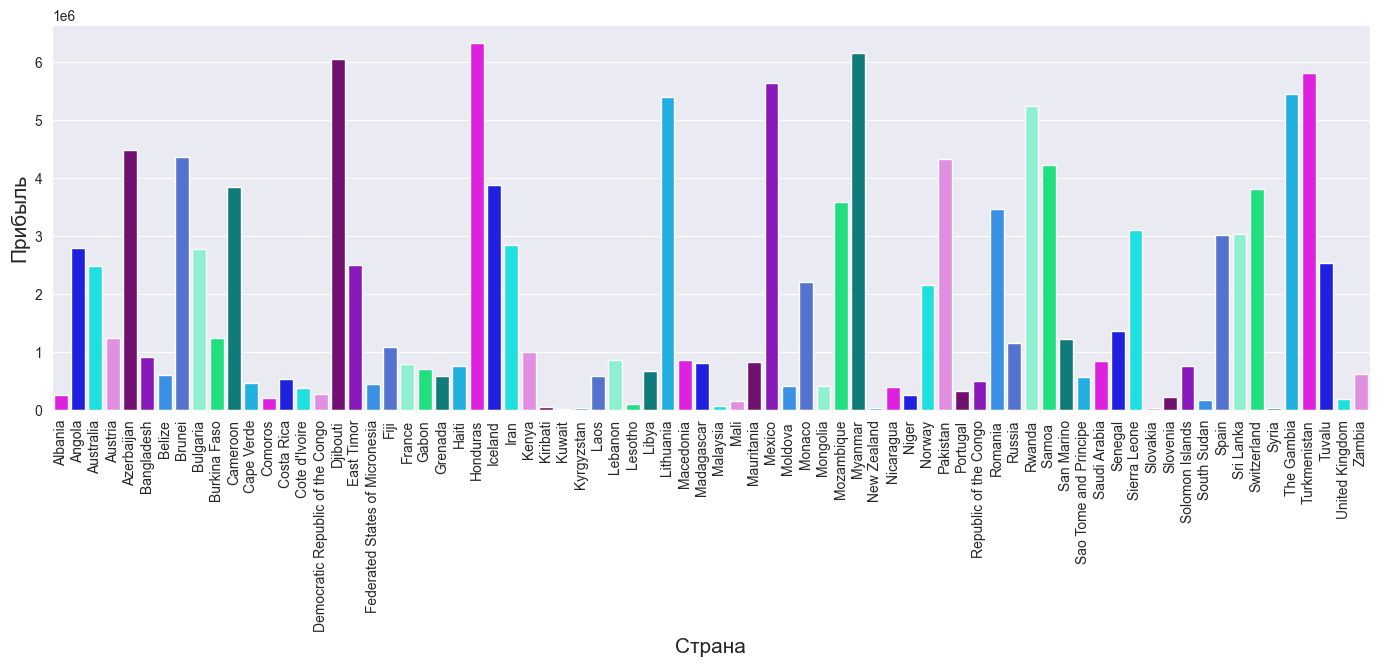

In [336]:
sales = data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')
plt.figure(figsize=(17,5))
sns.barplot(x= sales['Country'], y= sales['Total Revenue'], color='fuchsia', palette=col)
plt.xticks(rotation= 90)
plt.xlabel('Страна', fontsize=15)
plt.ylabel('Прибыль', fontsize=15)
plt.show()

12- What is the distribution of unit prices for each item type?

In [337]:
distribution= data.groupby(data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


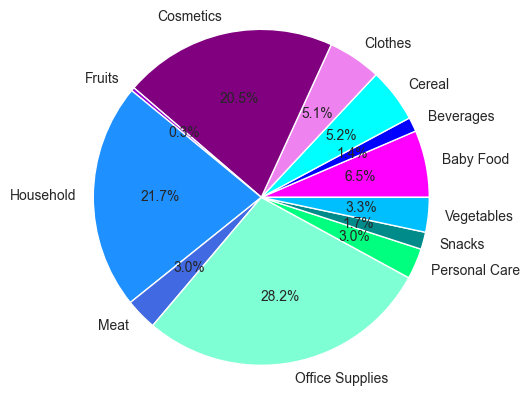

In [338]:
plt.pie(x= distribution['Unit Price'], labels= distribution['Item Type'],autopct='%1.1f%%', colors=col)
plt.axis('equal')
plt.show()

13- Which sales channel has the highest average unit price?

In [339]:
data.groupby(data['Sales Channel'])['Unit Price'].mean().reset_index(name= 'Average price')

,Sales Channel,Average price
0,Offline,310.7206
1,Online,242.8020


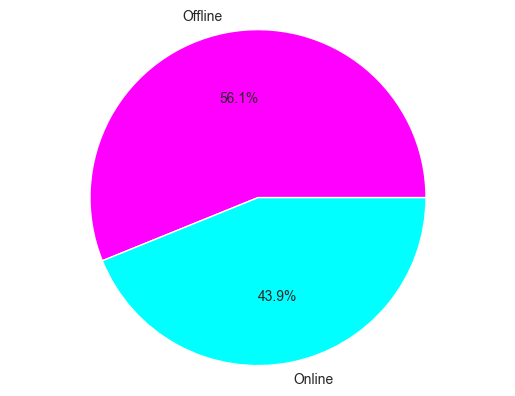

In [340]:
channel = data.groupby(data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'Average price')
plt.pie(x= channel['Average price'],labels=channel['Sales Channel'], autopct= '%1.1f%%', colors=['fuchsia', 'cyan'])
plt.axis('equal')
plt.show()

14- Are there any outliers in the total cost distribution?

In [341]:


q1= data['Total Cost'].quantile(0.25)
q3= data['Total Cost'].quantile(0.75)

iqr= q3-q1

lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

outliers= data[(data['Total Cost']<lower_fence)| (data['Total Cost']>upper_fence)].reset_index(drop= True)
outliers



,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,5 days
1,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.0,1367272.50,44 days
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days


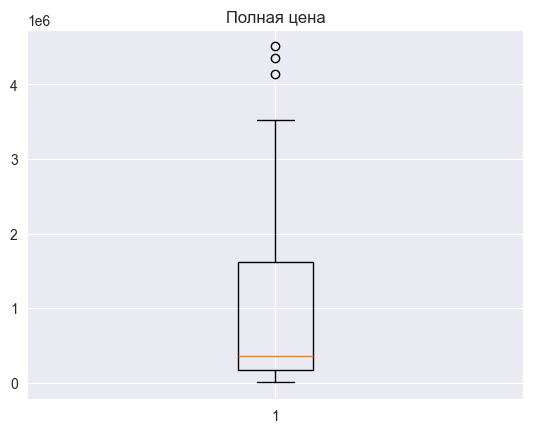

In [342]:

plt.boxplot(data['Total Cost'])
plt.title('Полная цена')
plt.show()


15- How does the total profit vary across different item types?

In [343]:
data.groupby(data['Item Type'])['Total Profit'].sum().reset_index(name='Total Profit')

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


16- What is the average order processing time for each country?

In [344]:
data.groupby(data['Country'])['Processing Time'].mean()

Country
Albania                            44 days 00:00:00
Angola                              4 days 00:00:00
Australia                          18 days 16:00:00
Austria                             7 days 00:00:00
Azerbaijan                         30 days 00:00:00
Bangladesh                         47 days 00:00:00
Belize                             44 days 00:00:00
Brunei                             37 days 00:00:00
Bulgaria                           26 days 12:00:00
Burkina Faso                       10 days 00:00:00
Cameroon                           12 days 12:00:00
Cape Verde                         17 days 00:00:00
Comoros                            31 days 00:00:00
Costa Rica                         13 days 00:00:00
Cote d'Ivoire                      19 days 00:00:00
Democratic Republic of the Congo   50 days 00:00:00
Djibouti                           13 days 08:00:00
East Timor                         42 days 00:00:00
Federated States of Micronesia     18 days 00:00:00
Fiji

17- Which region has the highest average total revenue per order?

In [345]:
data['avg total revenue']= data['Total Revenue']/data['Units Sold']
highest_avg_total_revenue_per_order= data.groupby(data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)
highest_avg_total_revenue_per_order.head(1)

Region
Asia    335.809091
Name: avg total revenue, dtype: float64

19- Is there a relationship between the number of units sold and the total profit?

In [346]:
print('Корреляция между количеством проданного товара и прибылью:', data['Units Sold'].corr(data['Total Profit']))

Корреляция между количеством проданного товара и прибылью: 0.5645504620845976


20- How does the order priority vary based on the item type?

In [347]:
data.groupby(data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')

,Order Priority,Item Type,No. Of Items
0,C,Beverages,7
1,C,Clothes,4
2,C,Office Supplies,2
3,C,Personal Care,2
4,C,Vegetables,2
5,C,Baby Food,1
6,C,Cereal,1
7,C,Cosmetics,1
8,C,Fruits,1
9,C,Household,1
